## Google Ads Policial Case Study

### Project Overview
This project explores the real-world impact of political advertising on voter behavior across the United States, with a special. To gain an understanding whether increased ad exposure truly shifts voter decisions is both politically and socially relevant—especially as campaign spending continues to break records.

The analysis integrates multiple datasets:
Political ad spend by candidate and state
County-level election results
Demographic and socioeconomic data

By combining these sources, I aim to uncover patterns between media exposure and election outcomes.
During the Exploratory Data Analysis (EDA) phase, I’ll visualize trends using:
Choropleth maps to highlight ad spend and voting margins across states
Correlation heatmaps to explore relationships between variables like income, education, and turnout
Scatter plots and bar charts to compare ad types and their localized effects
The core hypothesis is that higher political ad spend in a region correlates with an increased likelihood of voting for the advertised candidate.

To evaluate this, I will build a predictive model—starting with logistic regression—to classify which candidate a region is likely to vote for based on ad spend and key demographic indicators.

Ultimately, this project seeks to test the power of exposure and influence, and whether more money really does mean more votes.

In [109]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [111]:
data = pd.read_csv('data.csv')

In [112]:
print(data.columns)

Index(['state', 'country', 'population', 'median_income', 'education_level',
       'party_registration_dem', 'party_registration_rep', 'total_ad_spend',
       'candidate_a_spend', 'candidate_b_spend', 'winner', 'voter_turnout'],
      dtype='object')


In [113]:
# Check for missing values in the entire dataset
print(data.isnull().sum())

state                     0
country                   0
population                0
median_income             0
education_level           0
party_registration_dem    0
party_registration_rep    0
total_ad_spend            0
candidate_a_spend         0
candidate_b_spend         0
winner                    0
voter_turnout             3
dtype: int64


In [114]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [115]:
merged_data = data  

In [116]:
election_results = data[['state', 'country', 'winner', 'voter_turnout']]
demographics = data[['state', 'country', 'median_income', 'education_level']]
ad_spend = data[['state', 'total_ad_spend', 'candidate_a_spend', 'candidate_b_spend']]

# Merge the subsets
merged_data = election_results.merge(demographics, on=['state', 'country'])
merged_data = merged_data.merge(ad_spend, on='state')

In [117]:
# Aggregate total ad spend by state
state_ad_spend = data.groupby('state')['total_ad_spend'].sum().reset_index()

/var/folders/l8/12rg56151p745fbmtdv0n8dw0000gn/T/ipykernel_21357/4215615718.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




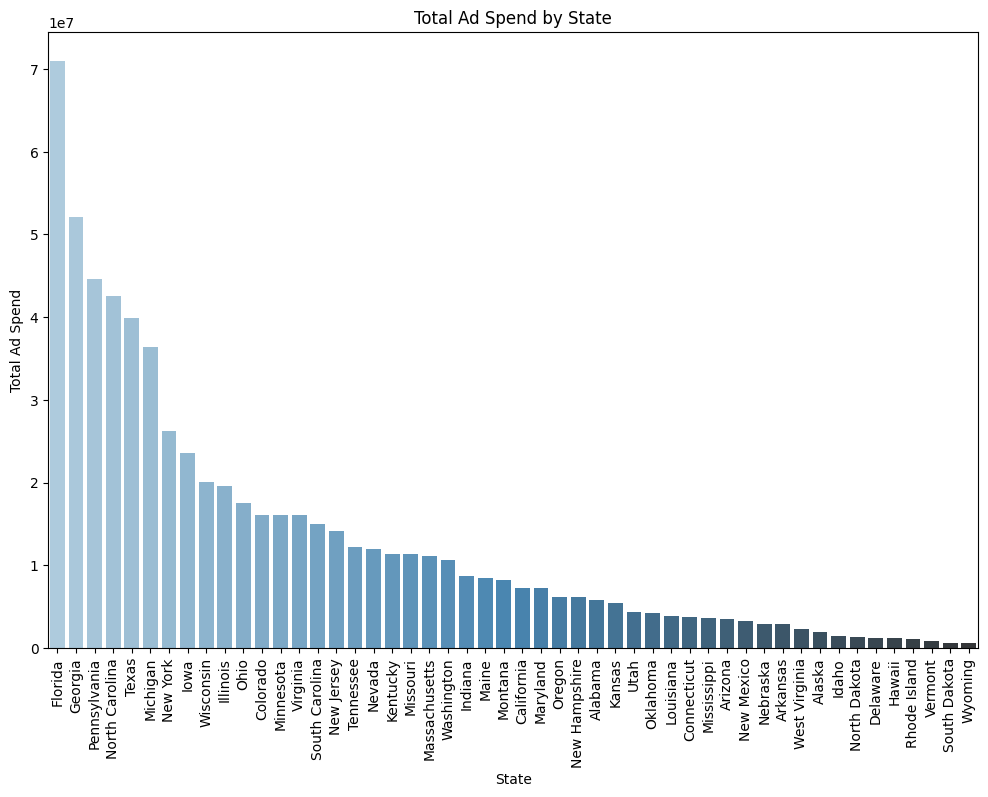

In [118]:
import seaborn as sns

# Sort by total ad spend for better visualization
state_ad_spend = state_ad_spend.sort_values(by='total_ad_spend', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='total_ad_spend', data=state_ad_spend, palette='Blues_d')
plt.xlabel('State')
plt.ylabel('Total Ad Spend')
plt.title('Total Ad Spend by State')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.show()

In [119]:
print(state_ad_spend)

             state  total_ad_spend
8          Florida        70934900
9          Georgia        52114000
37    Pennsylvania        44590500
32  North Carolina        42583400
42           Texas        39936100
21        Michigan        36431500
31        New York        26248800
14            Iowa        23547800
48       Wisconsin        20018100
12        Illinois        19588900
34            Ohio        17490900
5         Colorado        16093300
22       Minnesota        16060800
45        Virginia        16060100
39  South Carolina        15009700
29      New Jersey        14138700
41       Tennessee        12216600
27          Nevada        12010400
16        Kentucky        11383900
24        Missouri        11304900
20   Massachusetts        11087100
46      Washington        10606000
13         Indiana         8757200
18           Maine         8490200
25         Montana         8203800
4       California         7296000
19        Maryland         7255000
36          Oregon  

In [120]:
party_data = data[['state', 'party_registration_dem', 'party_registration_rep']]

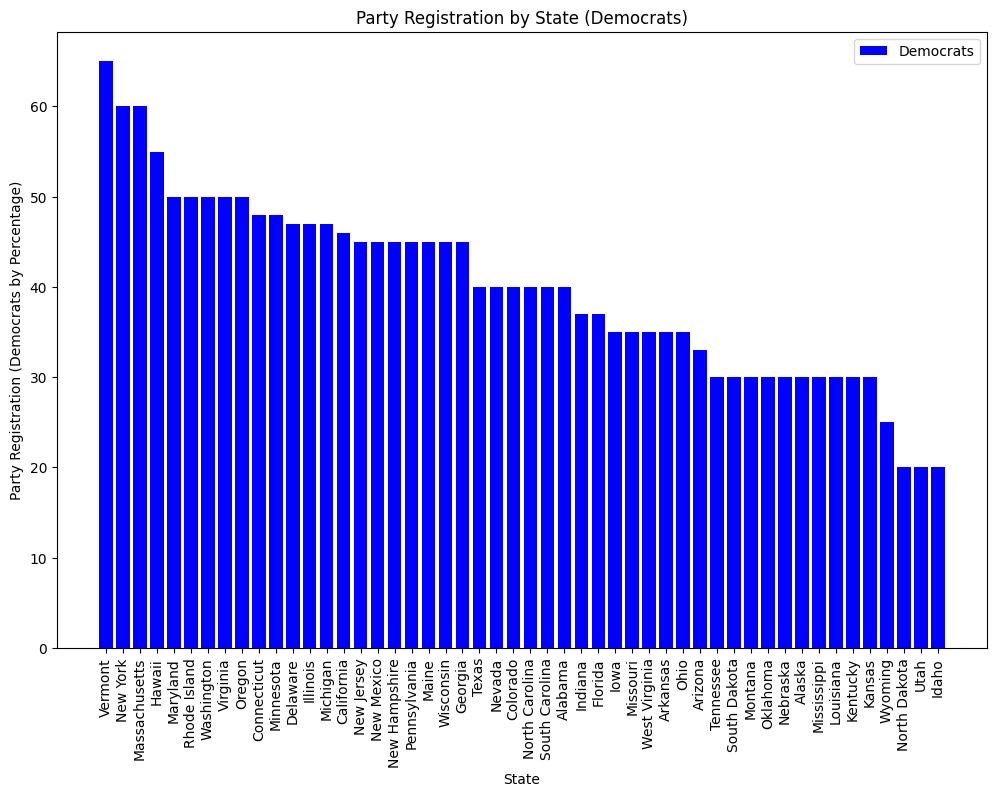

In [121]:
import matplotlib.pyplot as plt

# Sort by party registration for better visualization
party_data_dem = party_data.sort_values(by='party_registration_dem', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(party_data_dem['state'], party_data_dem['party_registration_dem'], color='blue', label='Democrats')
plt.xlabel('State')
plt.ylabel('Party Registration (Democrats by Percentage)')
plt.title('Party Registration by State (Democrats)')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.legend()
plt.show()

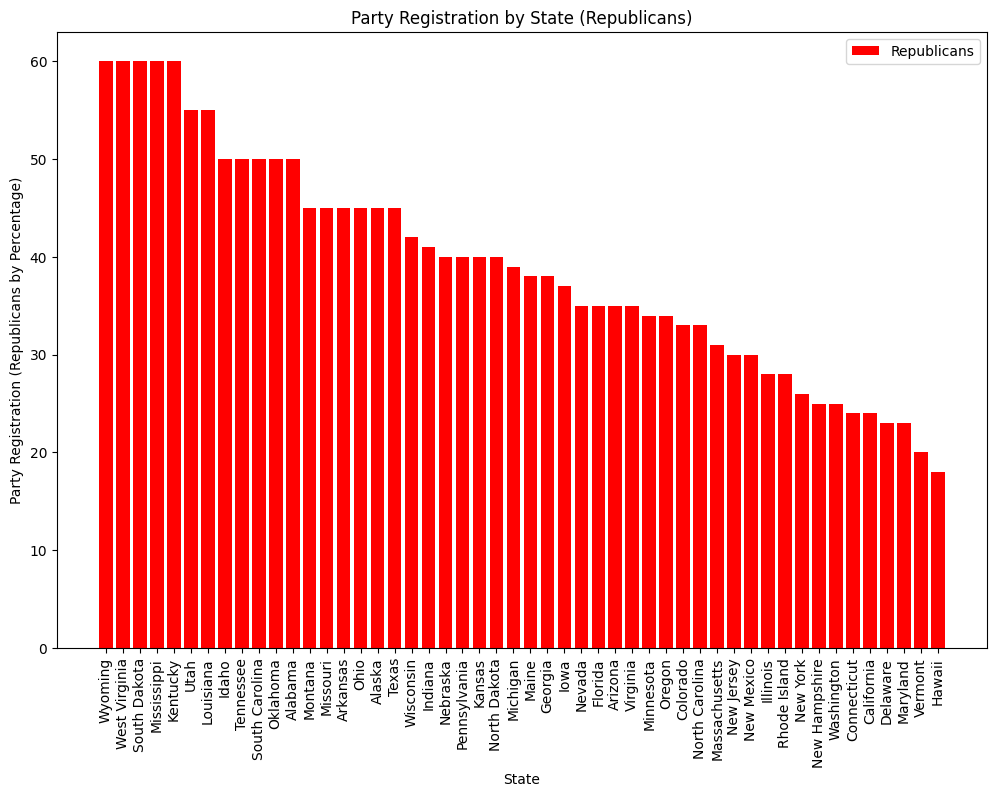

In [122]:
# Sort by party registration for better visualization
party_data_rep = party_data.sort_values(by='party_registration_rep', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(party_data_rep['state'], party_data_rep['party_registration_rep'], color='red', label='Republicans')
plt.xlabel('State')
plt.ylabel('Party Registration (Republicans by Percentage)')
plt.title('Party Registration by State (Republicans)')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.legend()
plt.show()

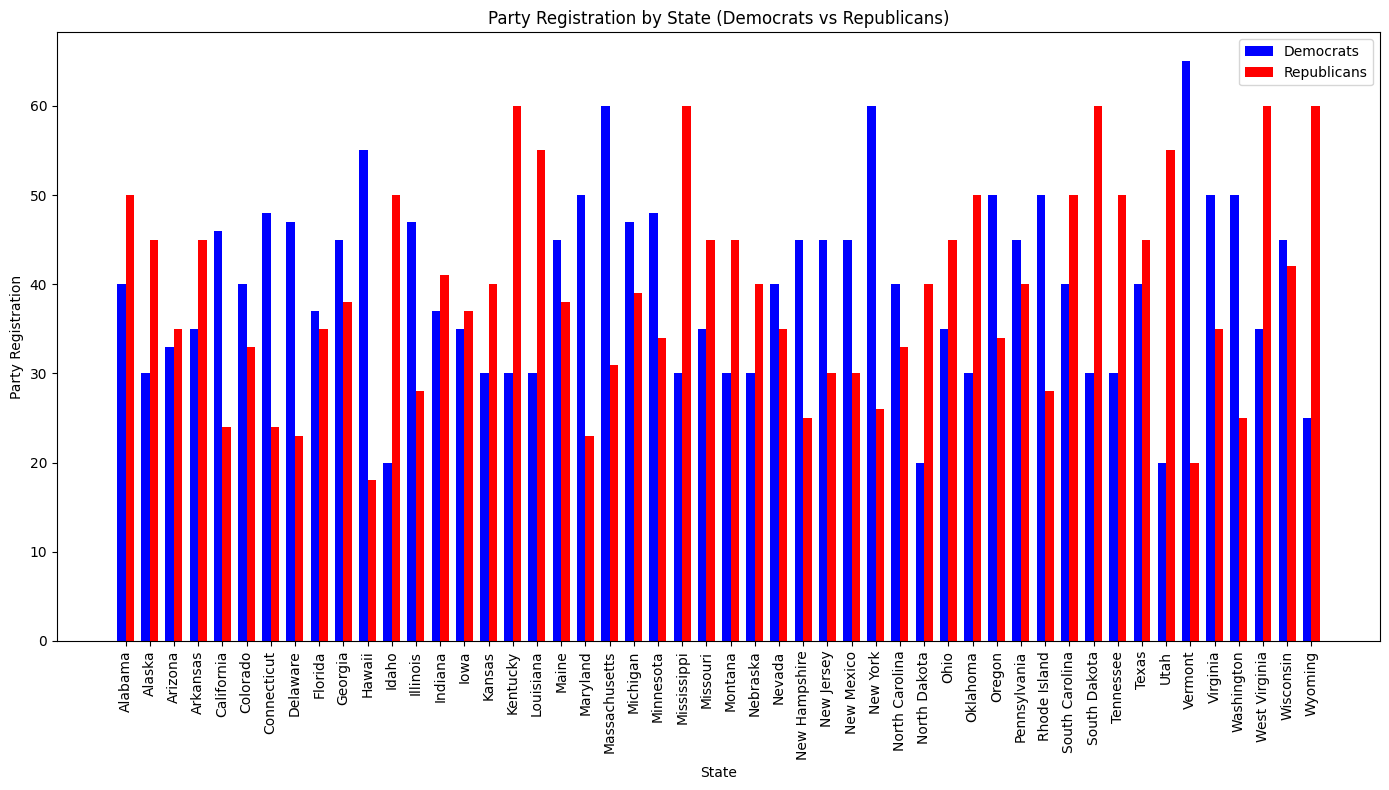

In [123]:
import numpy as np

# Set up the data
party_data = party_data.sort_values(by='state')  # Ensure states are aligned
x = np.arange(len(party_data['state']))  # The label locations
width = 0.35  # The width of the bars

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
plt.bar(x - width/2, party_data['party_registration_dem'], width, label='Democrats', color='blue')
plt.bar(x + width/2, party_data['party_registration_rep'], width, label='Republicans', color='red')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Party Registration')
plt.title('Party Registration by State (Democrats vs Republicans)')
plt.xticks(x, party_data['state'], rotation=90)  # Rotate state labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

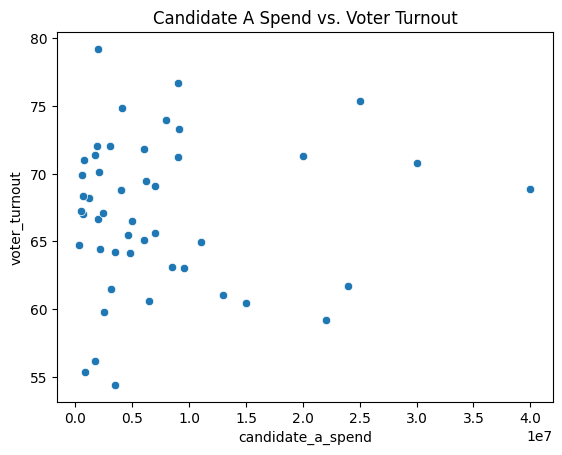

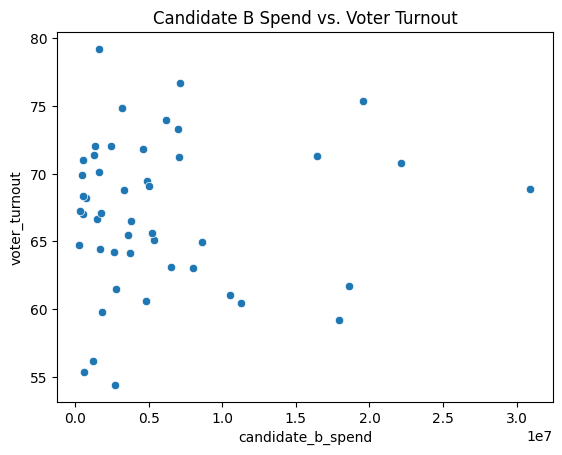

In [124]:
# Candidate A Spend vs. Voter Turnout
sns.scatterplot(data=merged_data, x='candidate_a_spend', y='voter_turnout')
plt.title('Candidate A Spend vs. Voter Turnout')
plt.show()

# Candidate B Spend vs. Voter Turnout
sns.scatterplot(data=merged_data, x='candidate_b_spend', y='voter_turnout')
plt.title('Candidate B Spend vs. Voter Turnout')
plt.show()

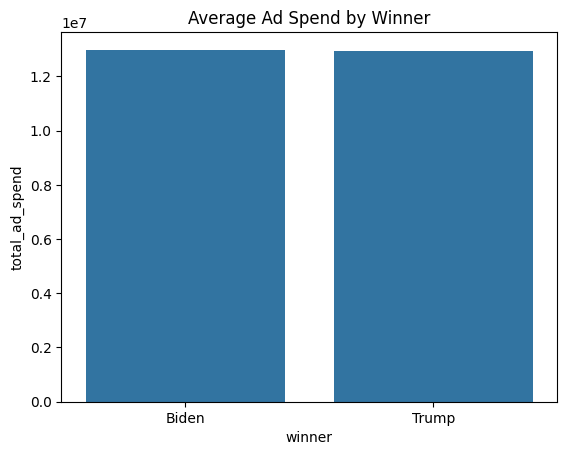

In [125]:
avg_spend_by_winner = merged_data.groupby('winner')['total_ad_spend'].mean().reset_index()

sns.barplot(data=avg_spend_by_winner, x='winner', y='total_ad_spend')
plt.title('Average Ad Spend by Winner')
plt.show()

In [126]:
corr_data = data[['median_income', 'education_level', 'party_registration_dem', 'party_registration_rep', 'voter_turnout']]

In [127]:
# Compute the correlation matrix
corr_matrix = corr_data.corr()

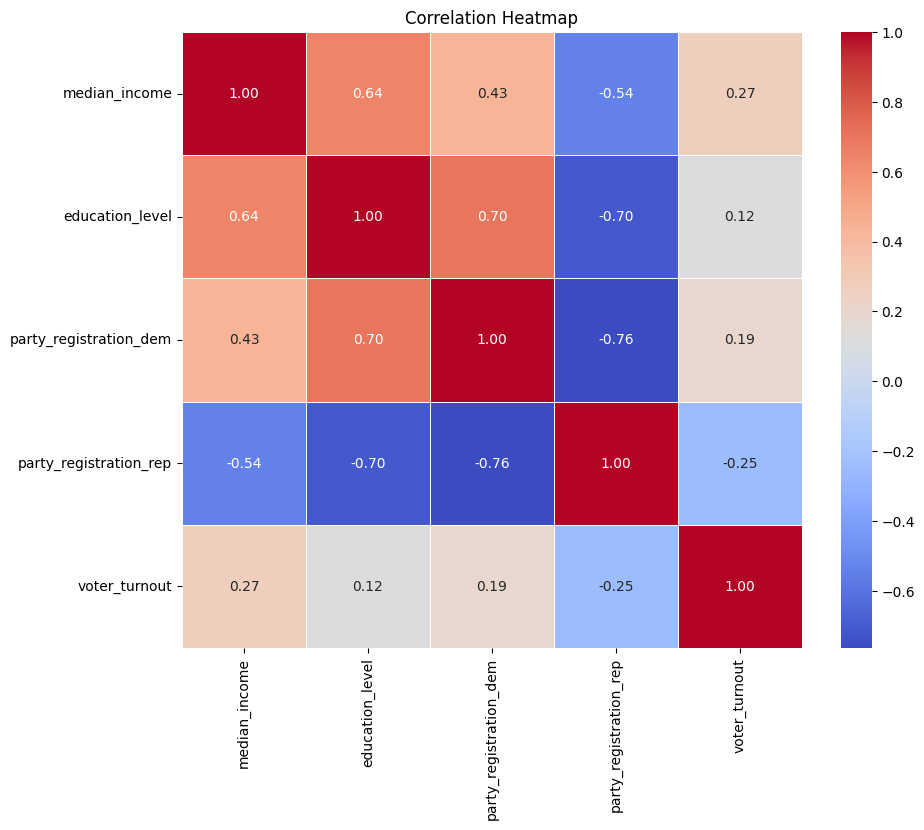

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [129]:
!pip install scikit-learn

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [131]:
# Defining the predictors and target
X = data[['candidate_a_spend', 'candidate_b_spend', 'population', 'median_income', 
          'education_level', 'party_registration_dem', 'party_registration_rep']]
y = data['winner']  # Ensure 'winner' is encoded as a categorical variable

In [132]:
# Encode target variable
y = y.astype('category').cat.codes

In [133]:
print(y.value_counts())

1    27
0    23
Name: count, dtype: int64


In [134]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [135]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)

In [136]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

In [140]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

--- Logistic Regression ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Confusion Matrix:


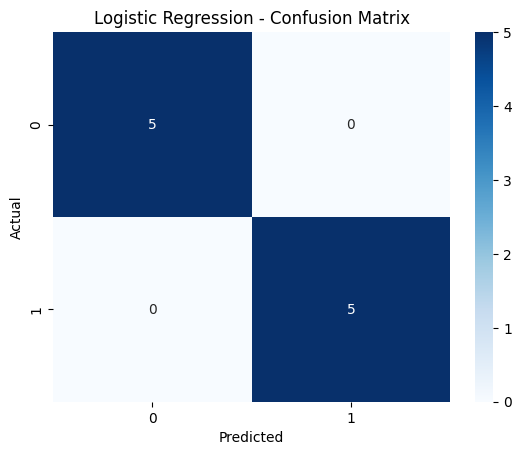

--- Random Forest ---
Accuracy: 0.80
Precision: 0.86
Recall: 0.80
F1-Score: 0.79

Confusion Matrix:


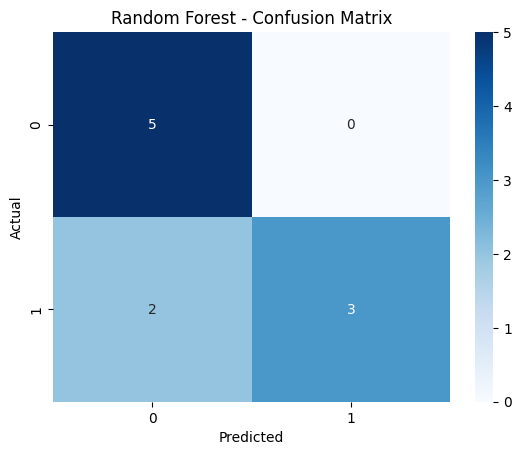

In [143]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

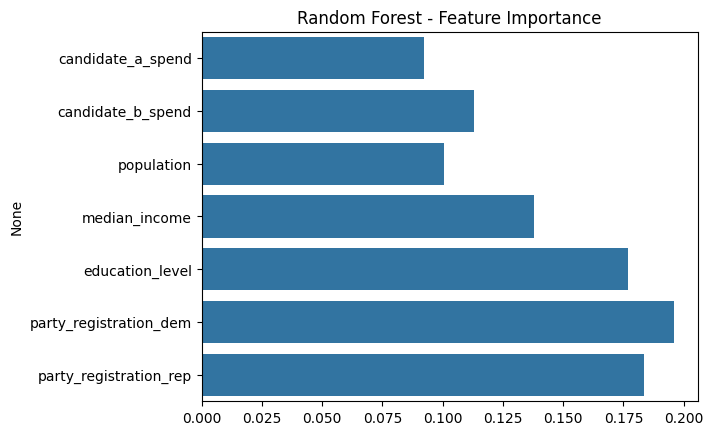

In [145]:
# Feature importance for Random Forest
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Random Forest - Feature Importance')
plt.show()

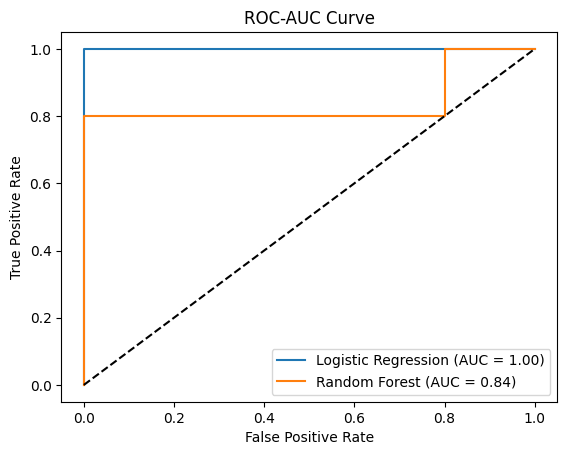

In [146]:
from sklearn.metrics import roc_curve, auc


models = {'Logistic Regression': log_reg, 'Random Forest': rf}
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()